# Rf 3 0 2_Utilfuncs
Multidimensional models: utility functions classes available for use in tailoring of composite (multidimensional)
pdfs



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:46 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"
#include "RooFormulaVar.h"
#include "RooAddition.h"
#include "RooProduct.h"
#include "RooPolyVar.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH1.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Create observables, parameters
 -----------------------------------------------------------

Create observables

In [3]:
RooRealVar x("x", "x", -5, 5);
RooRealVar y("y", "y", -5, 5);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create parameters

In [4]:
RooRealVar a0("a0", "a0", -1.5, -5, 5);
RooRealVar a1("a1", "a1", -0.5, -1, 1);
RooRealVar sigma("sigma", "width of gaussian", 0.5);

Using rooformulavar to tailor pdf
 -----------------------------------------------------------------------

Create interpreted function f(y) = a0 - a1*sqrt(10*abs(y))

In [5]:
RooFormulaVar fy_1("fy_1", "a0-a1*sqrt(10*abs(y))", RooArgSet(y, a0, a1));

Create gauss(x,f(y),s)

In [6]:
RooGaussian model_1("model_1", "Gaussian with shifting mean", x, fy_1, sigma);

Using roopolyvar to tailor pdf
 -----------------------------------------------------------------------

Create polynomial function f(y) = a0 + a1*y

In [7]:
RooPolyVar fy_2("fy_2", "fy_2", y, RooArgSet(a0, a1));

Create gauss(x,f(y),s)

In [8]:
RooGaussian model_2("model_2", "Gaussian with shifting mean", x, fy_2, sigma);

Using rooaddition to tailor pdf
 -----------------------------------------------------------------------

Create sum function f(y) = a0 + y

In [9]:
RooAddition fy_3("fy_3", "a0+y", RooArgSet(a0, y));

Create gauss(x,f(y),s)

In [10]:
RooGaussian model_3("model_3", "Gaussian with shifting mean", x, fy_3, sigma);

Using rooproduct to tailor pdf
 -----------------------------------------------------------------------

Create product function f(y) = a1*y

In [11]:
RooProduct fy_4("fy_4", "a1*y", RooArgSet(a1, y));

Create gauss(x,f(y),s)

In [12]:
RooGaussian model_4("model_4", "Gaussian with shifting mean", x, fy_4, sigma);

Plot all pdfs
 ----------------------------

Make two-dimensional plots in x vs y

In [13]:
TH1 *hh_model_1 = model_1.createHistogram("hh_model_1", x, Binning(50), YVar(y, Binning(50)));
TH1 *hh_model_2 = model_2.createHistogram("hh_model_2", x, Binning(50), YVar(y, Binning(50)));
TH1 *hh_model_3 = model_3.createHistogram("hh_model_3", x, Binning(50), YVar(y, Binning(50)));
TH1 *hh_model_4 = model_4.createHistogram("hh_model_4", x, Binning(50), YVar(y, Binning(50)));
hh_model_1->SetLineColor(kBlue);
hh_model_2->SetLineColor(kBlue);
hh_model_3->SetLineColor(kBlue);
hh_model_4->SetLineColor(kBlue);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_1_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_2_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_3_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_4_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make canvas and draw rooplots

In [14]:
TCanvas *c = new TCanvas("rf302_utilfuncs", "rf302_utilfuncs", 800, 800);
c->Divide(2, 2);
c->cd(1);
gPad->SetLeftMargin(0.20);
hh_model_1->GetZaxis()->SetTitleOffset(2.5);
hh_model_1->Draw("surf");
c->cd(2);
gPad->SetLeftMargin(0.20);
hh_model_2->GetZaxis()->SetTitleOffset(2.5);
hh_model_2->Draw("surf");
c->cd(3);
gPad->SetLeftMargin(0.20);
hh_model_3->GetZaxis()->SetTitleOffset(2.5);
hh_model_3->Draw("surf");
c->cd(4);
gPad->SetLeftMargin(0.20);
hh_model_4->GetZaxis()->SetTitleOffset(2.5);
hh_model_4->Draw("surf");

Draw all canvases 

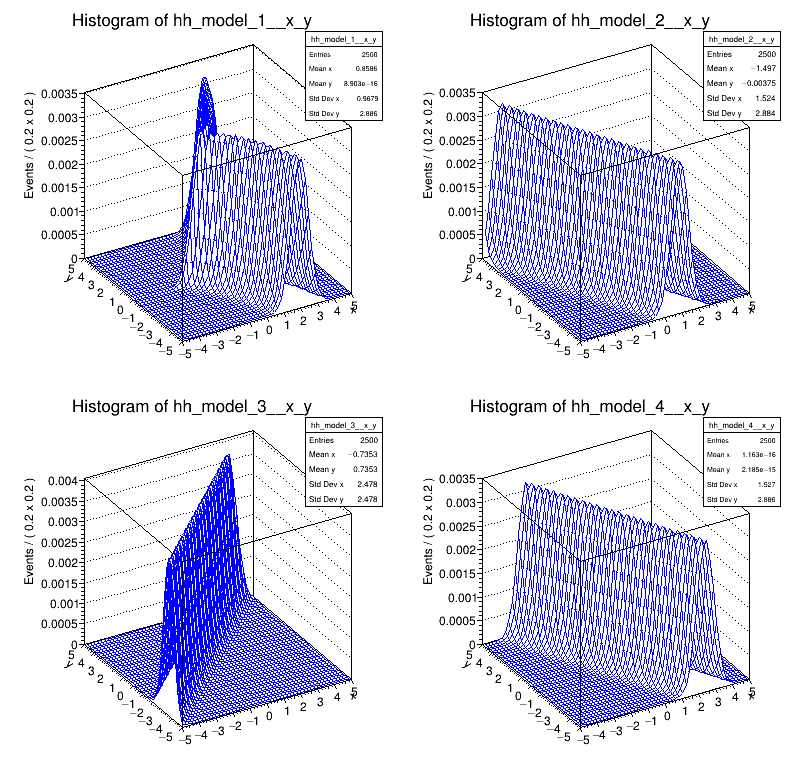

In [15]:
gROOT->GetListOfCanvases()->Draw()